# Two sample t-test:
## Working with the equations to calculate the test statistic and the P-value 

You find in statistical textbooks and online often the detailed decription of the t-test. Things get often confusing when you work with more than one book or online resources because the mathematical notations are different and the equations are slightly different.

In this exercise we will compare the results from Scipy's function _ttest_ind_ (in package _scipy.stats_) to the results from the equations given in Appendix A of John Townend's Practical Statistics book, and the equations that the Collaborative Statistics textbook presents in Chapter 10, where they discuss the two-sample t-test (reading the sections 10.1-10.3 is recommended).


In [44]:
import numpy as np
from scipy.stats import ttest_ind, norm
import matplotlib.pyplot as plt

default = False
test_df_formula = True


if default:
    sample1=np.array([100,107,115,96,102,110,109,103,99,106])
    sample2=np.array([95,90,102,100,98,90,100,95,88,105])
elif test_df_formula:
    sample1=np.array([100,107,115,96,102]) # test df calculation effect ,110,109,103,99,106])
    sample2=np.array([95,90,102,100,98,90,100,95,88,105,110,109,103,99,106]) # added the samples here
# so df=n1+n2-2 would be the same 





In [45]:
m1, s1, n1 =np.mean(sample1) , np.std(sample1,ddof=1) , np.size(sample2)
m2, s2, n2 =np.mean(sample2) , np.std(sample2,ddof=1) , np.size(sample2)

print ("Summary statistics : mean,     standard deviation,   sample size")
print (72*'-')
print ("sample data set 1  : %8.4f, %8.4f , %8.4f " %(m1,s1**2,n1))
print ("sample data set 2  : %8.4f, %8.4f , %8.4f " %(m2,s2**2,n2))


Summary statistics : mean,     standard deviation,   sample size
------------------------------------------------------------------------
sample data set 1  : 104.0000,  53.5000 ,  15.0000 
sample data set 2  :  99.3333,  46.2381 ,  15.0000 


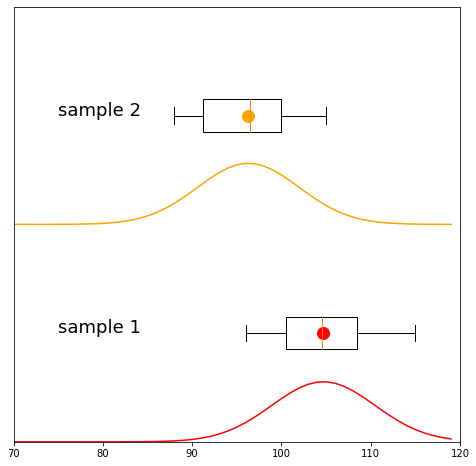

In [40]:
plt.figure(figsize=[8,8])
# putting the two data arrays into a list
# for boxplot comparison
dataset= [ sample1, sample2 ]
plt.boxplot(dataset,vert=False)
plt.xlim([70,120])
plt.yticks([])
plt.text(75,1,"sample 1",fontsize=18)
plt.text(75,2,"sample 2",fontsize=18)
plt.plot(m1,1,'o',color='red', markersize=12,label='mean of sample 1')
plt.plot(m2,2,'o',color='orange',markersize=12,label='mean of sample 2')

plt.legend


# add fitted gaussian to the data
x=np.arange(70,120)
pdf1=norm.pdf(x,loc=m1,scale=s1)
pdf2=norm.pdf(x,loc=m2,scale=s2)
plt.plot(x,pdf1*4+0.5,color='red')
plt.plot(x,pdf2*4+1.5,color='orange')
plt.show()


## 1 Appendix A: Unpaired t-test example data


Equations: 


(a) Pooled estimate of variance ('pooled variance')

$\Large s_p^2 = \frac{(n_1-1)\,s_1^2 + (n_2-1)\,s_2^2}{n_1+n_2-2}$


(b) Test statistic

$\Large t_{df}= \frac{|\,\bar{x_1} -\bar{x_2}\,|}{\sqrt{s_p^2\,(\frac{1}{n_1} +\frac{1}{n_2}})}$

The symbol '| |' indicates the absolute value of the difference in the mean(Python function _np.abs_)

(c) Degrees of Freedom

$ df = n_1+n_2-2$



In [3]:
diff=np.abs(m1-m2)
sp2 = ( (n1-1)*s1**2+ (n2-1)*s2**2 ) /(n1+n2-2)
tvalue=diff/(np.sqrt(sp2*(1./n1+1./n2)))
print ("mean abs difference, sp2, tvalue: %10.6f, %10.6f, %10.6f " % (diff,sp2,tvalue))

mean abs difference, sp2, tvalue:   8.400000,  32.788889,   3.280205 


In [4]:
from scipy.stats import ttest_ind
from scipy.stats.distributions import t 

# we will need the function t.cdf to look up the pvalue for our tvalue 
# with a function call like this pvalue=t.cdf(tvalue,df) 


## 2. Collaborative Statistics (Section 10.2)

(a) Estimate the standard error for the difference in the means (Eq 10.1)

$\Large se_{diff} = \sqrt{\frac{(s_1)^2}{n_1}+\frac{(s_2)^2}{n_2}} = \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$

Note: This is the Gaussian error propagation equation that you may have encountered in other classes already (e.g. ENV327)

(b) Test statistic (Equation 10.2)

$\Large t_{df} = \frac{|\bar{x_1}-\bar{x_2}|}{\sqrt{\frac{s_1^2}{n_1} +\frac{s_2^2}{n_2}}}$

Note: The population means $\mu_1$ and $\mu_2$ that the authors used in their equation are assumed to be identitical ( $\mu_1-\mu_2 = 0)$. That's the null hypothesis test assumption that we always make, so we can ignore them in the traditional t-test situation. Further, we conduct a two-sided test. We are looking for large differences either negative values or positive values, so the absolute difference is used.

(c) The degrees of freedom estimate (Equation 10.3):

$\Large  df =  \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{1}{n_1-1}\, \left(\frac{s_1^2}{n_1}\right)^2 + \frac{1}{n_2-1}\, \left(\frac{s_2^2}{n_2}\right)^2}$


This is a complicated-looking equation, but it only depends on the samples sizes and the standard deviations. 
Tip: use helpful variables to store partial terms of the calculation, for example calculate the numerator (top) and denominator (bottom) of the fraction separately and then finally divide. 

Inspection of the equations shows that the terms

$\frac{s_1^2}{n_1}$ and $\frac{s_2^2}{n_2}$ are repeatedly used.
We assign them to two variables _help1_ and _help2_.


In [41]:
# Does the degree of freedom actually matter much when we calculate the -p-values Let's have a look at the
# t-distribution

# calculation of df:

help1=s1**2/n1
help2=s2**2/n2

nominator=(help1+help2)**2
denominator= 1/(n1-1)*help1**2 + 1/(n2-1)*help2**2

df=nominator/denominator
print("calculated degrees of freedom with 'complicated formula' df = %.4f" %(df))
print("simple df calculation df=n1+n2-2: ", n1+n2-2)

calculated degrees of freedom with 'complicated formula' df = 17.9948
simple df calculation df=n1+n2-2:  18


## Summary and Conclusion

- We can reproduced the results of the scipy.stats function _ttest-ind_. At large samples sizes and when the standard deviations in the two samples are nearly the same, the t-test results are giving us essentially the same numerical results.

- It is important to remember that the p-value returned from the function _ttest_ind_ is for a two-sided test.
You can use it directly in comparison with your 2-sided alpha value (pvalue<0.05 to reject the null hypothesis).

- You can use the sample sizes, means, and standard deviations (6 numerical values) to calculate p-values even if you don't have the full data available. That would allow you to validate results published in research reports, for example.
